# **Business Case Study**

**Restaurant Reviews:**

This project deals with building a Machine Learning Classification Model using NLP, where we are predicting weather a review is positive (1) or negative (0)

**Dataset link:** https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews/data

This dataset contains 2 attributes:

1. Customer Reviews
2. Liked

Customer reviews tells us about the reviews given by the customers for a food in restaurant and liked column tells about whether they liked the food (1) or not (0).

# **Business Solution**

## **Import the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration**

In [ ]:
dataset = pd.read_csv("/content/Restaurant_Reviews.tsv", delimiter='\t', quoting = 3)

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.shape

(1000, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


Dealing with missing values

In [ ]:
dataset.isnull().values.any()

False

<Axes: xlabel='Liked', ylabel='count'>

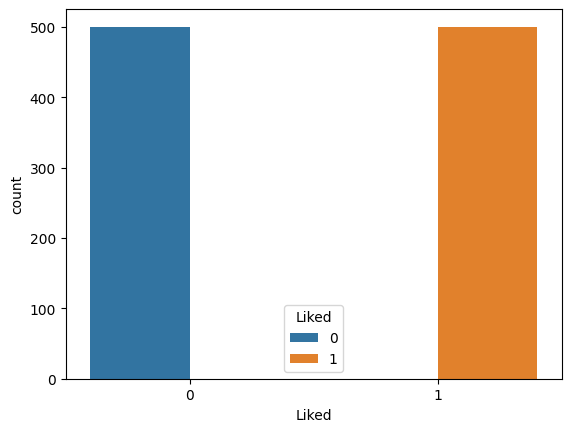

In [ ]:
sns.countplot(x='Liked', data=dataset, hue='Liked')

In [ ]:
print(f"Positive Reviews : {(dataset.Liked == 1).sum()}, Negative Reviews : {(dataset.Liked == 0).sum()}")

Positive Reviews : 500, Negative Reviews : 500


## **Data Preprocessing**

### **Checkpoint**

In [ ]:
data_1 = dataset

In [ ]:
data_1.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data_1['Length'] = data_1['Review'].apply(len)
data_1.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

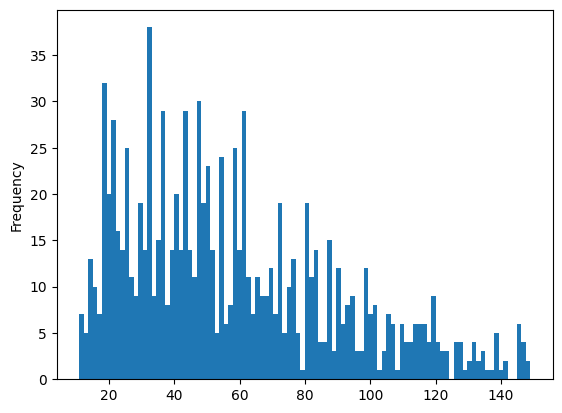

In [ ]:
data_1['Length'].plot(bins = 100, kind = 'hist')

In [ ]:
data_1.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [ ]:
data_1[data_1['Length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [ ]:
data_1[data_1['Length']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [ ]:
positive = data_1[data_1['Liked'] == 1]
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [ ]:
negative = data_1[data_1['Liked'] == 0]
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


### **Cleaning the Text**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', data_1['Review'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
print(corpus)
print(len(corpus))

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

### **Creating Bag of Words Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data_1.iloc[:, 1]

In [ ]:
x.shape

(1000, 1500)

In [ ]:
y.shape

(1000,)

### **Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.shape

(800, 1500)

In [ ]:
x_test.shape

(200, 1500)

In [ ]:
y_train.shape

(800,)

In [ ]:
y_test.shape

(200,)

## **Building the Model**

### **Naive_bayes Classifier**

**Training the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(x_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.695

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 50],
       [11, 84]])

### **XGBOOST Classifier**

**Model Building**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)

**Model Evaluation**

In [ ]:
accuracy_score(y_test, y_pred)

0.76

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 20],
       [28, 67]])

## **Final Model - XGBOOST CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier
Classifier = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print(f"accuracy score = {accuracy_score(y_test, y_pred)}")

cm = confusion_matrix(y_test, y_pred)

print(f"cm = {cm}")

accuracy score = 0.76
cm = [[85 20]
 [28 67]]
